In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
data=pd.read_csv("Modified_Data.csv")

In [6]:
# del data["Professional Info_std"]

In [7]:
data.columns

Index(['Account Number', 'Age', 'Defaults', 'Last_Month_Payment',
       'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_three_month', 'Churn', 'Time_period',
       'Contract_Time_Remaining', 'Address_mean', 'Address_std', 'Scheme_mean',
       'Scheme_std', 'Staus_mean', 'Staus_std', 'Gender_mean'

In [8]:
data["X"]=data["Account Number"].apply(lambda x: x[0])
train=data[data.X=="M"]
test=data[data.X=="V"]
del data["X"], train["X"], test["X"]

data.shape, train.shape, test.shape

((14952, 49), (9966, 49), (4986, 49))

> Percentage of Churners

In [9]:
# Percentage of Churners
print ("CHurners  :"+str(train["Churn"].sum()/len(train)*100))
print ("Non-Churners  :"+str( 100-train["Churn"].sum()/len(train)*100))

CHurners  :5.077262693156733
Non-Churners  :94.92273730684326


> 

> # Preparing data

In [10]:
#

In [11]:
data.columns

Index(['Account Number', 'Age', 'Defaults', 'Last_Month_Payment',
       'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_three_month', 'Churn', 'Time_period',
       'Contract_Time_Remaining', 'Address_mean', 'Address_std', 'Scheme_mean',
       'Scheme_std', 'Staus_mean', 'Staus_std', 'Gender_mean'

In [12]:
#

In [13]:
#Preparing data
def prepare_data(df, is_train):

    if is_train:
        return df.drop(['Churn',"Account Number"], axis=1), df['Churn']
    return     df.drop([        "Account Number"], axis=1)

In [14]:
Xtrain, Ytrain =prepare_data(train, 1)
main_data,Nopee= prepare_data(test,1)

In [15]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split( Xtrain, Ytrain, stratify=Ytrain)

In [16]:
ytrain.sum()/len(ytrain), ytest.sum()/len(ytest)

(0.05070912496655071, 0.05096308186195827)

> 

In [17]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.metrics import roc_curve, auc

>  # Functions

In [18]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

> # Cost Description

In [19]:
admin_cost=3
offer_cost=100
clv=1000#customer lifetime value

In [20]:
conv=0.5
tnc = 0.
fpc = admin_cost+offer_cost
fnc = clv
tpc = conv*offer_cost + (1. - conv)*(clv+admin_cost)

In [21]:
cost=np.array([[tnc,fpc],[fnc, tpc]])
print (cost)

[[    0.    103. ]
 [ 1000.    551.5]]


In [22]:
def average_cost(y, ypred, cost):
    c=confusion_matrix(y,ypred)
    print (c)
    score=np.sum(c*cost)/np.sum(c)
    return score
def repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 >= t)*1
    return ypred

In [23]:
# Cost when we predict everything 0
print (average_cost(ytest,np.zeros(len(ytest)),cost))

[[2365    0]
 [ 127    0]]
50.963081862


In [24]:
# Cost when we predict everything 1
print (average_cost(ytest,np.ones(len(ytest)),cost))

[[   0 2365]
 [   0  127]]
125.856942215


> # 1. Logistic Regression

In [95]:
Logistic=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(Logistic, param_grid=parameters, cv=5, scoring="f1")
fitmodel.fit(Xtrain, ytrain)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

({'C': 1}, 0.21183696085780709)

In [96]:
Logistic=LogisticRegression(C=fitmodel.best_params_['C'])
Logistic.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, Logistic.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, Logistic.predict(Xtest))))

Training :0.952502006957
Test :0.95304975923


In [100]:
a=Logistic.coef_

In [106]:
len(Xtrain.columns)

47

In [117]:
# importance=pd.DataFrame([Xtrain.columns,a[0]])
# importance=pd.DataFrame.transpose(importance)

# a=importance.sort(columns=1)
# a

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1
10,Payment_Settlement,-0.821657
12,Operational_Capabilities,-0.319143
9,Account,-0.268625
11,Utilities,-0.204957
27,Address_std,-0.0619732
37,Sale of Equipment Status_std,-0.0599841
33,Gender_std,-0.0444416
39,Equipment Warranty_std,-0.0435653
26,Address_mean,-0.0138419
36,Sale of Equipment Status_mean,-0.0132771


In [38]:
average_cost(ytest, Logistic.predict(Xtest), cost)

[[2355   10]
 [ 107   20]]


47.776886035313005

In [53]:
average_cost(ytest, repredict(Logistic,.2 ,Xtest), cost)

[[2302   63]
 [  92   35]]


47.267857142857146

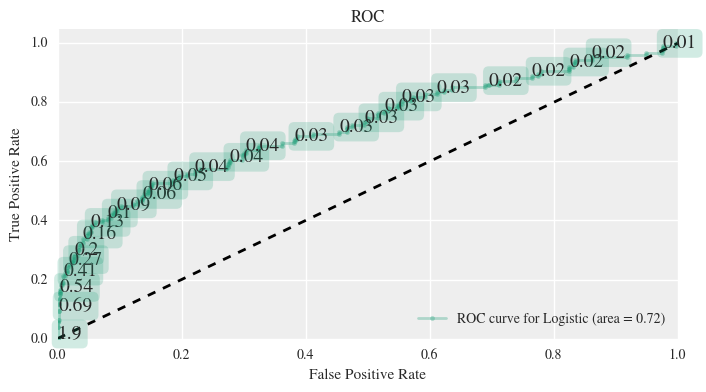

In [40]:
rcParams['figure.figsize'] = (8, 4)
make_roc("Logistic",Logistic, ytest, Xtest, None, labe=8)

[[   0 2365]
 [   0  127]]
[[2302   63]
 [  92   35]]
[[2343   22]
 [ 100   27]]
[[2358    7]
 [ 111   16]]
[[2364    1]
 [ 123    4]]
[[2365    0]
 [ 127    0]]


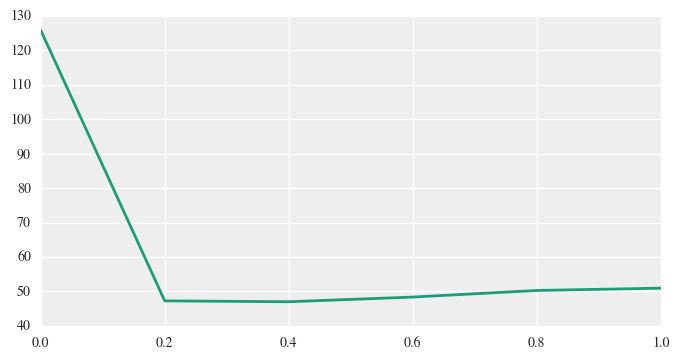

In [41]:
ts=np.linspace(0,1,6)
plt.plot(ts, [average_cost(ytest, repredict(Logistic, t, Xtest), cost) for t in ts] )

(array([ 2232.,   147.,    42.,    16.,    18.,     9.,     7.,    10.,
            8.,     3.]),
 array([  5.45696114e-05,   9.03067498e+00,   1.80612954e+01,
          2.70919158e+01,   3.61225362e+01,   4.51531566e+01,
          5.41837770e+01,   6.32143974e+01,   7.22450179e+01,
          8.12756383e+01,   9.03062587e+01]),
 <a list of 10 Patch objects>)

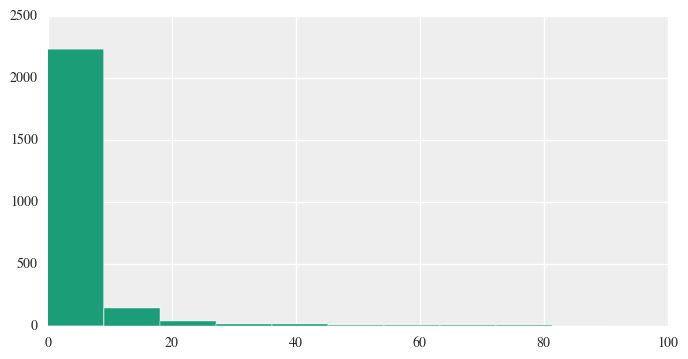

In [42]:
plt.hist(Logistic.predict_proba(Xtest)[:,1]*100)

In [43]:
from sklearn.metrics import classification_report
print (classification_report(ytest, Logistic.predict(Xtest)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2365
          1       0.67      0.16      0.25       127

avg / total       0.94      0.95      0.94      2492



> # Decision Tree

In [44]:
Decision_Tree=tree.DecisionTreeClassifier()
parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
fitmodel = GridSearchCV(Decision_Tree, param_grid=parameters, cv=5, scoring="f1")
fitmodel.fit(Xtrain, ytrain)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: Undefined

({'max_depth': 6, 'min_samples_leaf': 5}, 0.26445564910712643)

In [45]:
Decision_Tree=tree.DecisionTreeClassifier(max_depth=fitmodel.best_params_['max_depth'],min_samples_leaf=fitmodel.best_params_['min_samples_leaf'])   
Decision_Tree.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, Decision_Tree.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, Decision_Tree.predict(Xtest))))

Training :0.960797431094
Test :0.952247191011


In [46]:
average_cost(ytest, Decision_Tree.predict(Xtest), cost)

[[2344   21]
 [  98   29]]


46.611757624398074

In [47]:
average_cost(ytest, repredict(Decision_Tree,.36 ,Xtest), cost)

[[2330   35]
 [  95   32]]


46.650481540930976

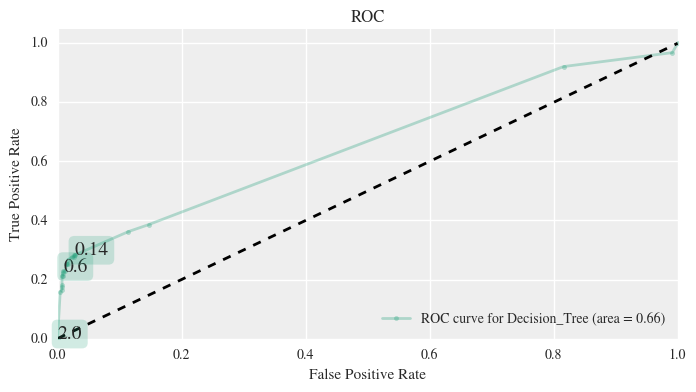

In [48]:
rcParams['figure.figsize'] = (8, 4)
make_roc("Decision_Tree",Decision_Tree, ytest, Xtest, None, labe=8)

> # Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
Random_Forest = RandomForestClassifier()
parameters = {"n_estimators": list(range(1, 20))}
fitmodel = GridSearchCV(Random_Forest, param_grid=parameters, cv=5, scoring="f1")
fitmodel.fit(Xtrain, ytrain)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

({'n_estimators': 17}, 0.26633691233940326)

In [54]:
Random_Forest=RandomForestClassifier(n_estimators=fitmodel.best_params_['n_estimators'])   
Random_Forest.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, Random_Forest.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, Random_Forest.predict(Xtest))))

Training :0.997190259566
Test :0.954253611557


In [55]:
average_cost(ytest, Random_Forest.predict(Xtest), cost)

[[2351   14]
 [ 100   27]]


46.682383627608345

In [56]:
average_cost(ytest, repredict(Random_Forest,.29 ,Xtest), cost)

[[2295   70]
 [  89   38]]


47.017255216693421

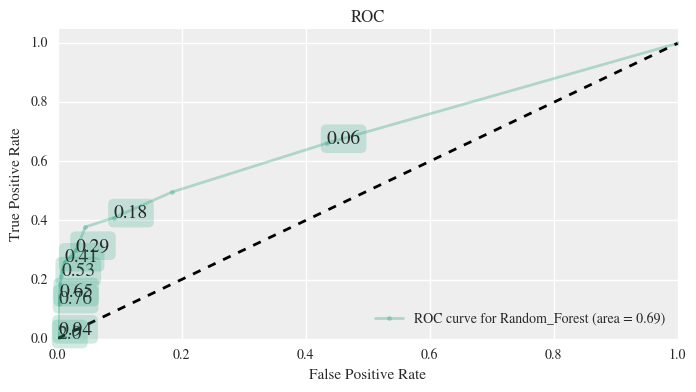

In [57]:
rcParams['figure.figsize'] = (8, 4)
make_roc("Random_Forest",Random_Forest, ytest, Xtest, None, labe=2)

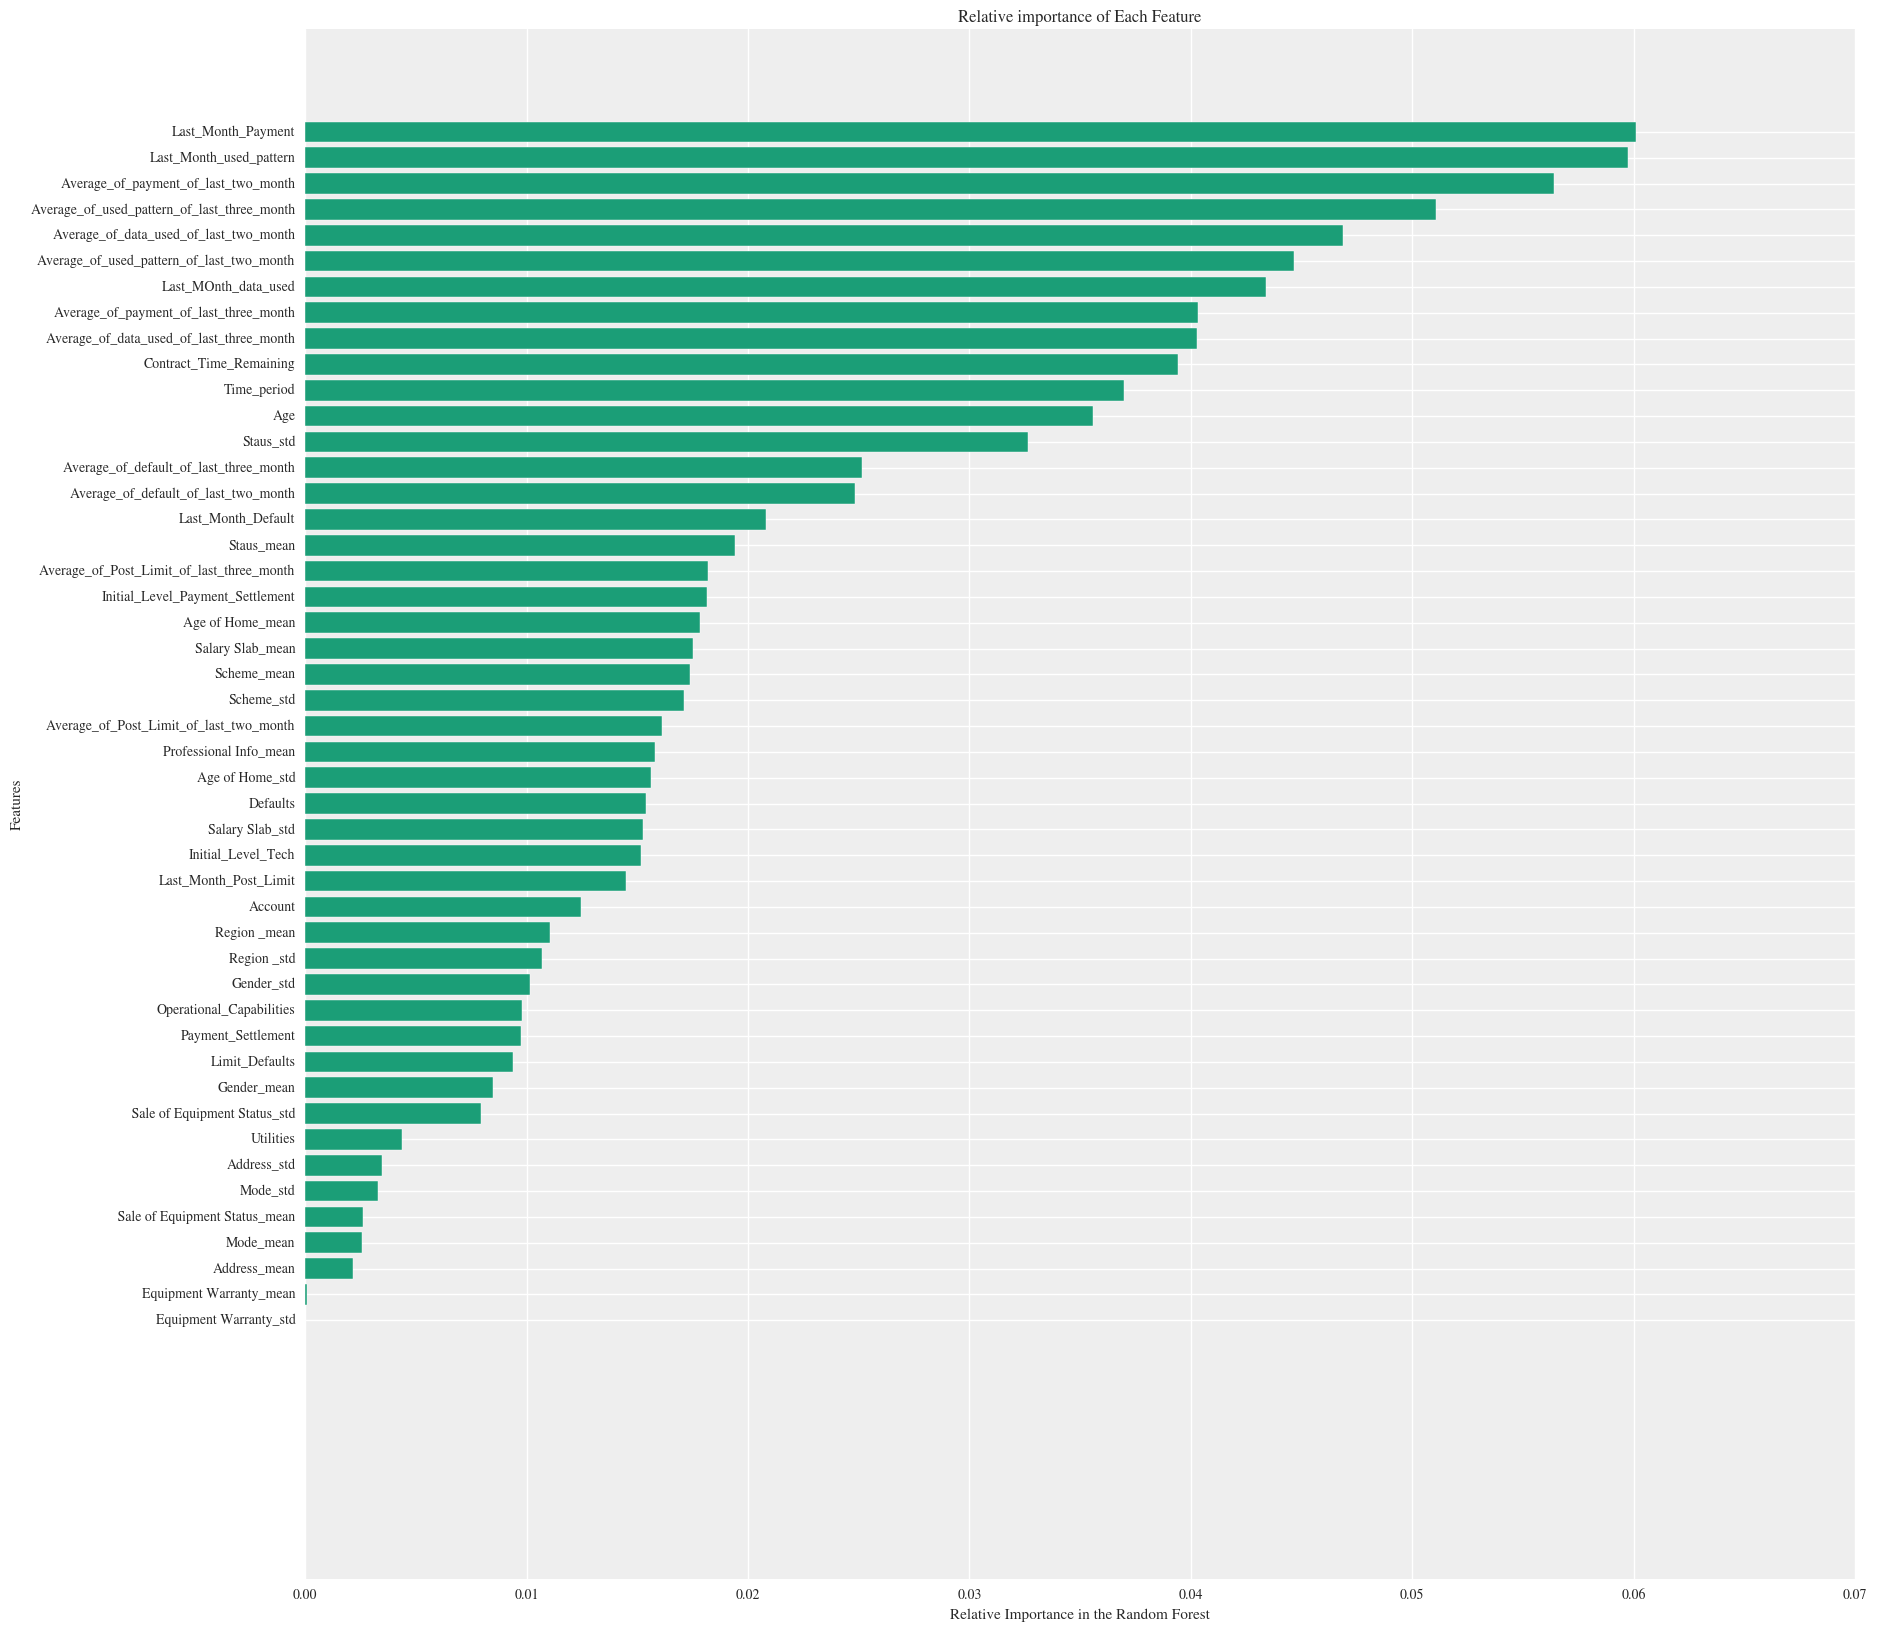

In [58]:
rcParams['figure.figsize'] = (20, 20)
importance_list = Random_Forest.feature_importances_
name_list = Xtrain.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

> # AdaBoost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier()
parameters = {"n_estimators": list(range(10, 60))}
fitmodel = GridSearchCV(AdaBoost, param_grid=parameters, cv=5, scoring="f1")
fitmodel.fit(Xtrain, ytrain)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

({'n_estimators': 15}, 0.26418453122013907)

In [60]:
AdaBoost=AdaBoostClassifier(n_estimators=fitmodel.best_params_['n_estimators'])   
AdaBoost.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, AdaBoost.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, AdaBoost.predict(Xtest))))

Training :0.950762643832
Test :0.954253611557


In [61]:
average_cost(ytest, AdaBoost.predict(Xtest), cost)

[[2350   15]
 [  99   28]]


46.543739967897274

In [62]:
average_cost(ytest, repredict(AdaBoost,.49 ,Xtest), cost)

[[2329   36]
 [  95   32]]


46.691813804173357

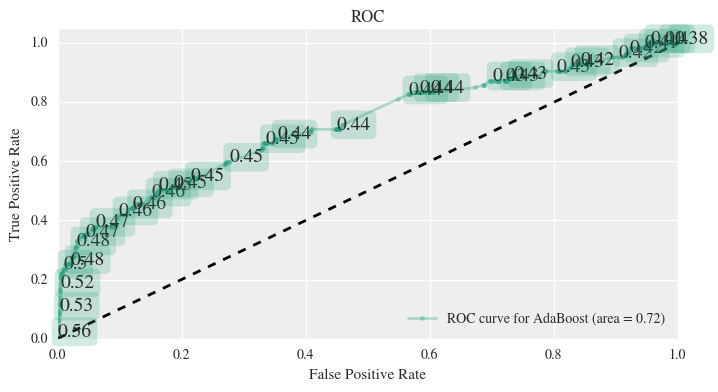

In [63]:
rcParams['figure.figsize'] = (8, 4)
make_roc("AdaBoost",AdaBoost, ytest, Xtest, None, labe=10)

> # Gradient boosting

In [64]:
# from sklearn.ensemble import GradientBoostingClassifier

# Gradient = GradientBoostingClassifier()
# parameters = {"n_estimators": list(range(30, 60)), "max_depth": [1, 2, 3, 4, 5]}
# fitmodel = GridSearchCV(Gradient, param_grid=parameters, cv=5, scoring="f1")
# fitmodel.fit(Xtrain, ytrain)
# ##fitmodel.best_estimator_, fitmodel.grid_scores_,
# fitmodel.best_params_, fitmodel.best_score_

In [65]:
Gradient=AdaBoostClassifier(n_estimators=fitmodel.best_params_['n_estimators'])   
Gradient.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, Gradient.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, Gradient.predict(Xtest))))

Training :0.950762643832
Test :0.954253611557


In [66]:
average_cost(ytest, Gradient.predict(Xtest), cost)

[[2350   15]
 [  99   28]]


46.543739967897274

In [67]:
average_cost(ytest, repredict(Gradient,.49 ,Xtest), cost)

[[2329   36]
 [  95   32]]


46.691813804173357

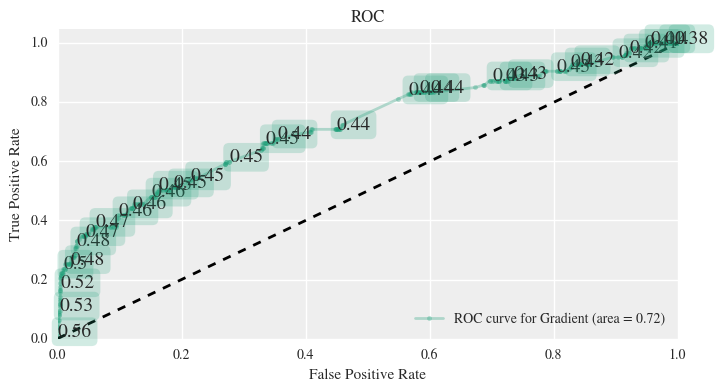

In [68]:
rcParams['figure.figsize'] = (8, 4)
make_roc("Gradient",Gradient, ytest, Xtest, None, labe=10)

> # XGBoost

In [85]:
#from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier

#XGBClassifier = XGBClassifier()
xgb1 = XGBClassifier(
                     learning_rate =0.01,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
#parameters = {"learning_rate": [.01,.05,.1]}
#fitmodel = GridSearchCV(xgb1, param_grid=parameters, cv=5, scoring="f1")
xgb1.fit(Xtrain, ytrain)
# ##fitmodel.best_estimator_, fitmodel.grid_scores_,
#xgb1.best_params_, fitmodel.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [89]:
import xgboost

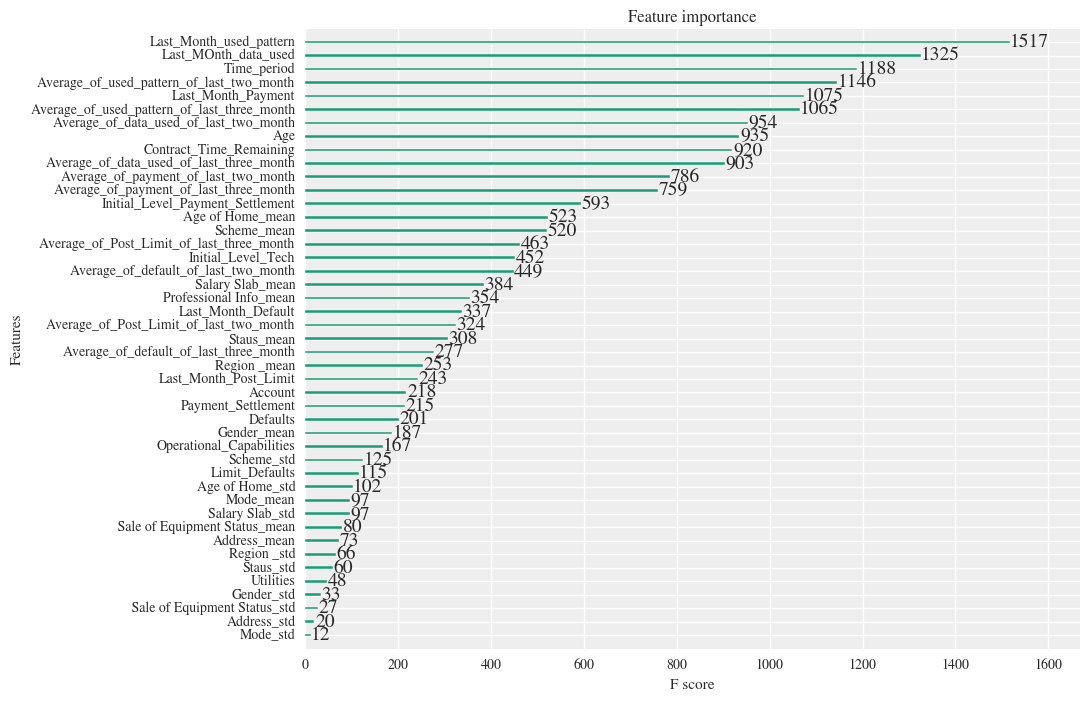

In [90]:
ax = xgboost.plot_importance(xgb1)
fig = ax.figure
fig.set_size_inches(10,8)

In [77]:
Xgboost=XGBClassifier(learning_rate=fitmodel.best_params_['learning_rate'])   
Xgboost.fit(Xtrain, ytrain)

print ("Training :"+str(accuracy_score( ytrain, Xgboost.predict(Xtrain))))
print ("Test :"+str(accuracy_score( ytest, Xgboost.predict(Xtest))))

Training :0.955980733208
Test :0.956661316212


In [78]:
average_cost(ytest, Xgboost.predict(Xtest), cost)

[[2355   10]
 [  98   29]]


46.157102728731942

In [79]:
average_cost(ytest, repredict(Xgboost,.24 ,Xtest), cost)

[[2090  275]
 [  76   51]]


53.150682182985555

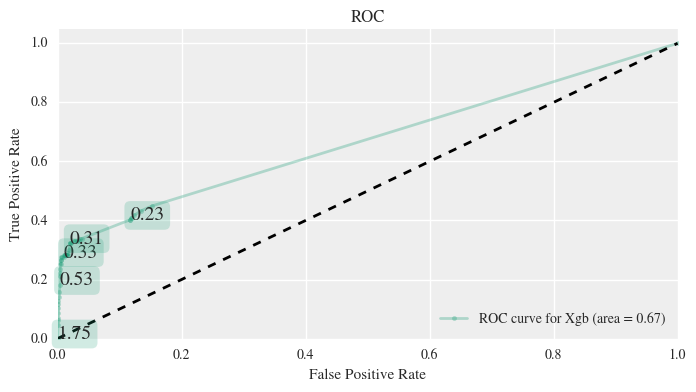

In [80]:
rcParams['figure.figsize'] = (8, 4)
make_roc("Xgb",Xgboost, ytest, Xtest, None, labe=10)

In [123]:
Corr = train.corr()["Churn"].sort_values()
Corr[0:len(Corr)-1]

Last_Month_used_pattern                       -0.157316
Average_of_used_pattern_of_last_two_month     -0.127440
Average_of_used_pattern_of_last_three_month   -0.108386
Last_Month_Payment                            -0.080525
Average_of_payment_of_last_two_month          -0.067422
Average_of_payment_of_last_three_month        -0.059273
Age                                           -0.041399
Time_period                                   -0.030244
Last_Month_Post_Limit                          0.005098
Address_std                                    0.005461
Address_mean                                   0.005461
Utilities                                      0.007979
 Sale of Equipment Status_std                  0.008746
 Sale of Equipment Status_mean                 0.008996
Average_of_Post_Limit_of_last_two_month        0.010978
Last_MOnth_data_used                           0.010981
Limit_Defaults                                 0.011013
Average_of_Post_Limit_of_last_three_month      0

In [ ]:
# ax=make_roc("Logistic",clfl2, ytestlr, Xtestlr, None, labe=60)
# make_roc("dt",clfdt, ytestlr, Xtestlr, ax, labe=1)

In [ ]:
#no